In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from keras.src.models import Sequential
from keras.src.optimizers import Adam, Adamax
from keras.src.losses import categorical_crossentropy
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.src.utils import img_to_array, load_img
from keras.src.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from keras import regularizers
import time
import shutil
import pathlib
import itertools
from PIL import Image
print("done")

done


In [2]:
dir = "C:/Users/Yevheniy/.cache/kagglehub/datasets/abdelghaniaaba/wildfire-prediction-dataset/versions/1/"
train_dir = f"{dir}train"    
valid_dir = f"{dir}valid" 
test_dir = f"{dir}test"        

In [ ]:
x_train = []
y_train = []
for direct in os.listdir(train_dir):
    print("Loading dataset training {}".format(direct))
    for filename in os.listdir(os.path.join(train_dir,direct)):
        img_path = os.path.join(train_dir,direct,filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (32,32))
        img = np.array(img)
        img = img/255
        x_train.append(img)
        y_train.append(direct)

Loading dataset training nowildfire


KeyboardInterrupt: 

In [11]:
x_val=[]
y_val=[]
for direct in os.listdir(valid_dir):
    print("Loading dataset validation {}".format(direct))
    for filename in os.listdir(os.path.join(valid_dir,direct)):
        img_path = os.path.join(valid_dir,direct,filename)
        image = cv2.imread(img_path)
        image = cv2.resize(image,(32,32))
        image = np.array(image)
        image = image/255
        x_val.append(image)
        y_val.append(direct)

Loading dataset validation nowildfire
Loading dataset validation wildfire


In [12]:
x_test=[]
y_test=[]
for direct in os.listdir(test_dir):
    print("Loading dataset test {}".format(direct))
    for filename in os.listdir(os.path.join(test_dir,direct)):
        img_path = os.path.join(test_dir,direct,filename)
        image = cv2.imread(img_path)
        image = cv2.resize(image,(32,32))
        image = np.array(image)
        image = image/255
        x_test.append(image)
        y_test.append(direct)

Loading dataset test nowildfire
Loading dataset test wildfire


In [5]:
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test = np.array(x_test)
y_train[30000]


NameError: name 'x_val' is not defined

In [14]:
y_train = [1 if label == "wildfire" else 0 for label in y_train]
y_val = [1 if label == "wildfire" else 0 for label in y_val]
y_test = [1 if label == "wildfire" else 0 for label in y_test]

In [15]:
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [16]:
len(x_train[4][4])


32

In [17]:
# (num_samples, height, width, num_channels)
print("x_train shape:", x_train.shape)  
print("x_valid shape:", x_val.shape)
print("x_test shape:", x_test.shape)

print("y_train shape:", y_train.shape)
print("y_valid shape:", y_val.shape)
print("y_test shape:", y_test.shape)

x_train shape: (30250, 32, 32, 3)
x_valid shape: (6300, 32, 32, 3)
x_test shape: (6300, 32, 32, 3)
y_train shape: (30250,)
y_valid shape: (6300,)
y_test shape: (6300,)


In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation="relu", padding="same"),
    Conv2D(128, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(256, (3, 3), activation="relu", padding="same"),
    Conv2D(256, (3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation="relu", padding="same"),
    Conv2D(128, (3, 3), activation="relu", padding="same"),
    
    Flatten(),
    
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    BatchNormalization(),
    
    Dense(1, activation="sigmoid")  # Output layer with number of classes
])

# Step 2: Compile the model
model.compile(optimizer="adam",
              loss="binary_crossentropy",  # Loss function for multi-class classification
              metrics=["accuracy"])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 30, 30, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 30, 30, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 15, 15, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 3, 3, 128)      │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 3, 3, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32)             │           12

 Total params: 1,782,529 (6.80 MB)

 Trainable params: 1,781,313 (6.80 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [19]:
from keras.src.callbacks import EarlyStopping

# Step 3: Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=20,
    batch_size=64,
    callbacks=[EarlyStopping(monitor="val_loss", patience=5)]
)

Epoch 1/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 106s 208ms/step - accuracy: 0.8818 - loss: 0.2920 - val_accuracy: 0.9113 - val_loss: 0.2238
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 96s 202ms/step - accuracy: 0.9241 - loss: 0.1947 - val_accuracy: 0.8454 - val_loss: 0.3602
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 97s 204ms/step - accuracy: 0.9335 - loss: 0.1696 - val_accuracy: 0.9237 - val_loss: 0.1773
Epoch 4/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 96s 203ms/step - accuracy: 0.9430 - loss: 0.1529 - val_accuracy: 0.4681 - val_loss: 1.9594
Epoch 5/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 97s 206ms/step - accuracy: 0.9437 - loss: 0.1502 - val_accuracy: 0.8408 - val_loss: 0.5619
Epoch 6/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 98s 206ms/step - accuracy: 0.9458 - loss: 0.1387 - val_accuracy: 0.6498 - val_loss: 1.5239
Epoch 7/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 97s 205ms/step - accuracy: 0.9520 - loss: 0.1258 - val_accuracy: 0.9456 - val_loss: 0.1645
Epoch 8/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 96s 204ms/step - accuracy: 0.9569 - loss: 

In [20]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Accuracy: {test_accuracy:.4f}")

197/197 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.9699 - loss: 0.0870
Test Accuracy: 0.9598


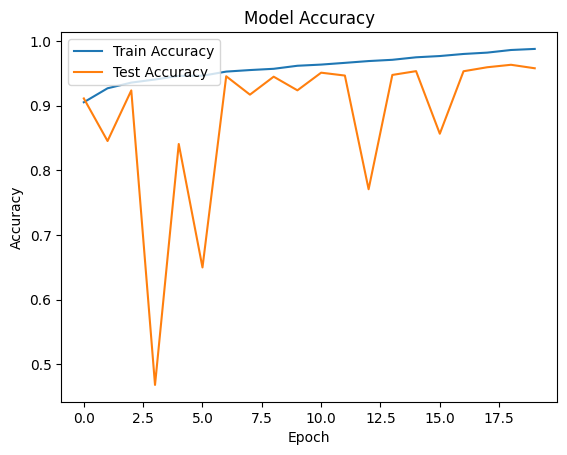

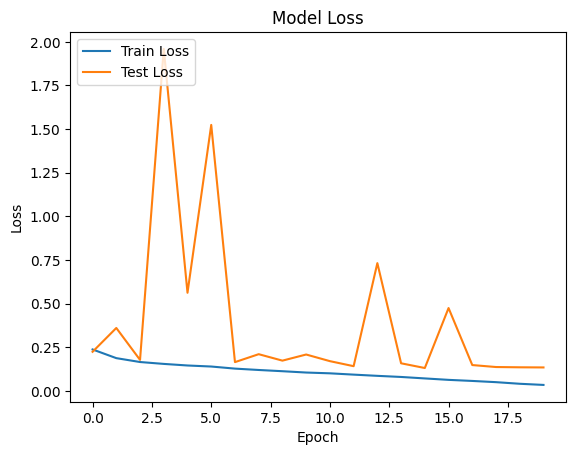

In [21]:
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Test Accuracy")
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(loc="upper left")
plt.show()

# Plot training & validation loss values
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Test Loss")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(loc="upper left")
plt.show()

In [22]:
# Predict on the datasets
y_train_pred = model.predict(x_train)
y_val_pred = model.predict(x_val)
y_test_pred = model.predict(x_test)

# Convert probabilities to binary classes if using a classification model
y_train_pred_classes = (y_train_pred > 0.5).astype("int32")
y_val_pred_classes = (y_val_pred > 0.5).astype("int32")
y_test_pred_classes = (y_test_pred > 0.5).astype("int32")

946/946 ━━━━━━━━━━━━━━━━━━━━ 31s 32ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step
197/197 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step


Confusion matrix for train: 



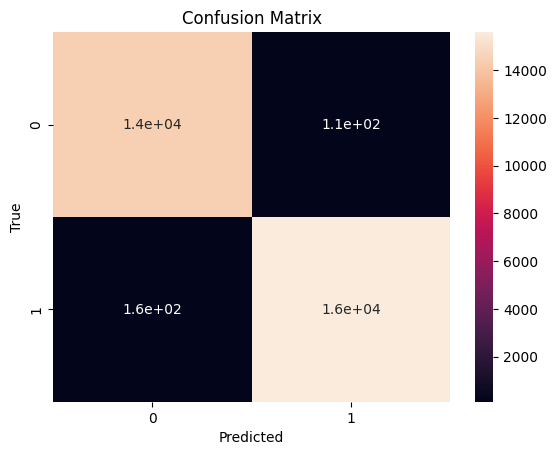

In [23]:
print("Confusion matrix for train: \n")
cm = confusion_matrix(y_train, y_train_pred_classes)
sns.heatmap(cm, annot=True)
plt.title(f"Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [24]:
from sklearn.metrics import  classification_report

print(f"classification report for train : \n{classification_report(y_train, y_train_pred_classes)}")

classification report for train : 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14500
           1       0.99      0.99      0.99     15750

    accuracy                           0.99     30250
   macro avg       0.99      0.99      0.99     30250
weighted avg       0.99      0.99      0.99     30250

